## Завдання:

Побудова та оцiнювання ансамблiв моделей класифiкацiї.

BaggingClassifier.

&nbsp;

Початковi данi:

(a) sklearn.datasets.samples_generator.make_circles

X, y = make_ circles(noise=0.2 , factor=0.5 , random_state=1)

### Опис методу побудови ансамблю:

У ансамблевих алгоритмах bagging методи утворюють клас алгоритмів, які будують кілька екземплярів моделей на випадкових підмножинах вихідного набору даних для тренування, а потім агрегують їхні індивідуальні прогнози, щоб сформувати остаточний прогноз. Ці методи використовуються як засіб для зменшення дисперсії базової моделі (наприклад, дерева рішень), вводячи випадковість у процедуру конструкції, а потім створюючи ансамбль. У багатьох випадках bagging методи є дуже простим способом покращення в порівнянні з однією моделлю, не роблячи при цьому необхідним адаптації базового алгоритму. Оскільки вони надають засіб для запобігання перенавчанню, bagging методи працюють найкраще з потужними та складними моделями (наприклад, повністю розробленими деревами рішень).

## Виконання завдання

In [1417]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_circles 
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics
import time

In [1418]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

### Набір даних (а):

In [1419]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

Візуалізація даних:

In [1420]:
np.unique(y)

array([0, 1])

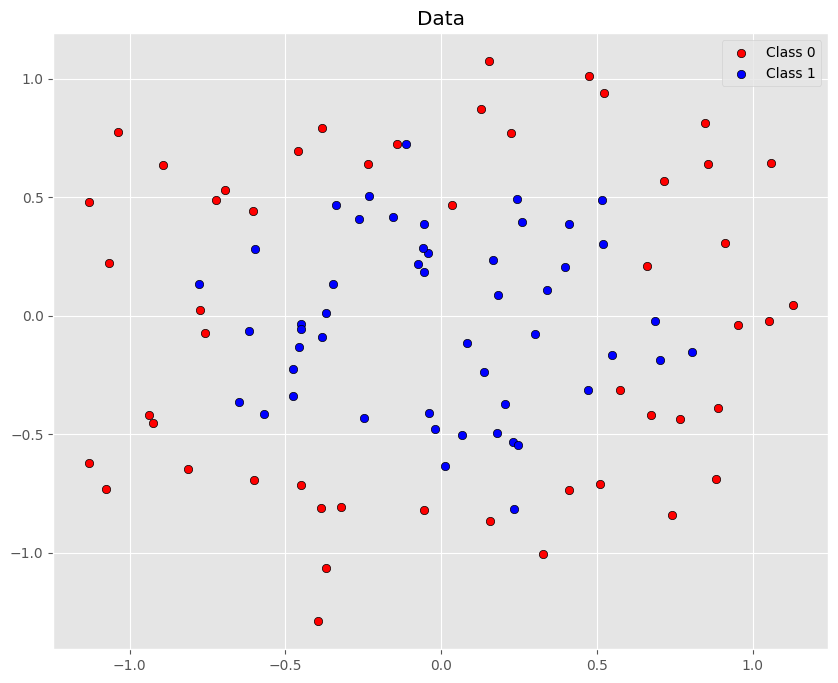

In [1421]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', edgecolors='black', label='Class 1')
plt.legend()
plt.title("Data")
plt.show()

Розбиття даних на навчальний та тестовий набори:

In [1422]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y, test_size=0.2)

In [1423]:
train_data.shape

(80, 2)

In [1424]:
test_data.shape

(20, 2)

In [1425]:
train_labels.shape

(80,)

In [1426]:
test_labels.shape

(20,)

Побудова ансамблю на основі дерев рішень, розглянувши різні значення max_samples, bootstrap, n_estimators:

In [1427]:
n_estimators = [5, 10, 20]
max_samples = [1, 5, 10]
bootstrap = [True, False]
f1_score = []

In [1428]:
for n_est in n_estimators:
    for max_samp in max_samples:
        for bootst in bootstrap:
            model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_est, max_samples=max_samp, bootstrap=bootst)
            model.fit(train_data, train_labels)
            f1_score.append(metrics.f1_score(test_labels, model.predict(test_data)))

n_estimators_df = []
max_samples_df = []
for i in range(3):
    n_estimators_df += [n_estimators[i]]*6
for i in range(9):
    max_samples_df += [max_samples[i % 3]]*2
bootstrap_df = bootstrap*9
comparison_df = pd.DataFrame({"n_estimators": n_estimators_df, "max_samples": max_samples_df, "bootstrap": bootstrap_df, "f1_score": f1_score})

In [1429]:
comparison_df

,n_estimators,max_samples,bootstrap,f1_score
0,5,1,True,0.000000
1,5,1,False,0.620690
2,5,5,True,0.631579
3,5,5,False,0.588235
4,5,10,True,0.900000
5,5,10,False,0.900000
6,10,1,True,0.620690
7,10,1,False,0.000000
8,10,5,True,0.947368
9,10,5,False,0.727273


In [1430]:
comparison_df.sort_values(by="f1_score", ascending=False)

,n_estimators,max_samples,bootstrap,f1_score
17,20,10,False,1.000000
10,10,10,True,1.000000
8,10,5,True,0.947368
4,5,10,True,0.900000
5,5,10,False,0.900000
11,10,10,False,0.842105
14,20,5,True,0.818182
16,20,10,True,0.800000
9,10,5,False,0.727273
15,20,5,False,0.666667


Отже, найкращими параметрами серед запропонованих для заданого ансамблю є параметри, для яких f1_score найвищий.

Побудуємо границі рішень для моделі з n_estimators=20, max_samples=10, bootstrap=False, що показала досить гарний результат:

In [1431]:
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20, max_samples=10, bootstrap=False)

In [1432]:
model.fit(train_data, train_labels)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=10, n_estimators=20)

In [1433]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 20 прикладів з 20


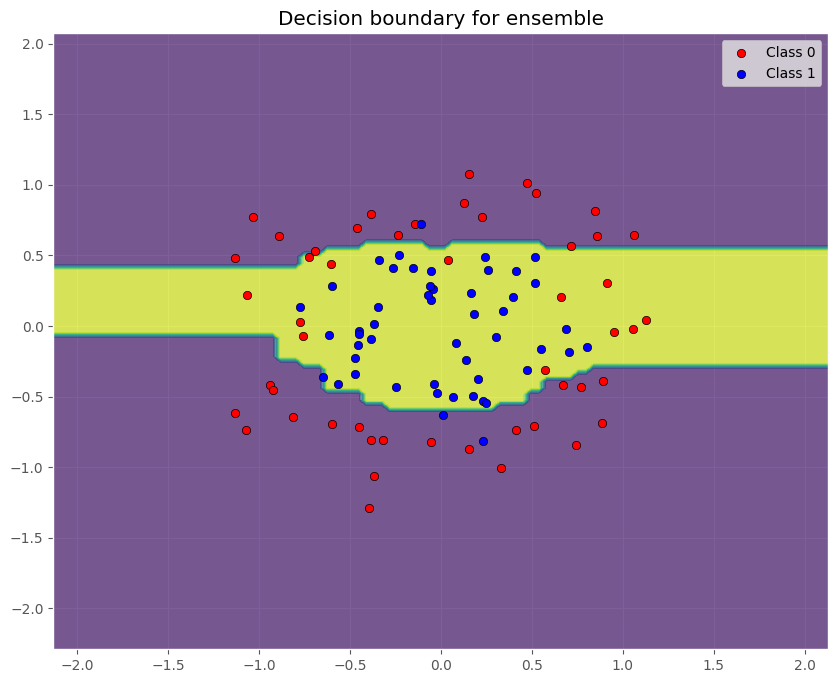

In [1434]:
DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', edgecolors='black', label='Class 1')
plt.legend()
plt.title("Decision boundary for ensemble")
plt.show()

Побудуємо ансамбль на основі методу опопрних векторів з гаусівською радіальною базисною функцією в якості ядра:

In [1435]:
model = BaggingClassifier(estimator=SVC(C=0.7, kernel="rbf"), oob_score=True)

In [1436]:
model.fit(train_data, train_labels)

BaggingClassifier(estimator=SVC(C=0.7), oob_score=True)

In [1437]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 20 прикладів з 20


In [1438]:
print(f"f1_score: {metrics.f1_score(test_labels, model.predict(test_data))}")
print(f"oob_score: {model.oob_score_}")

f1_score: 1.0
oob_score: 0.7625


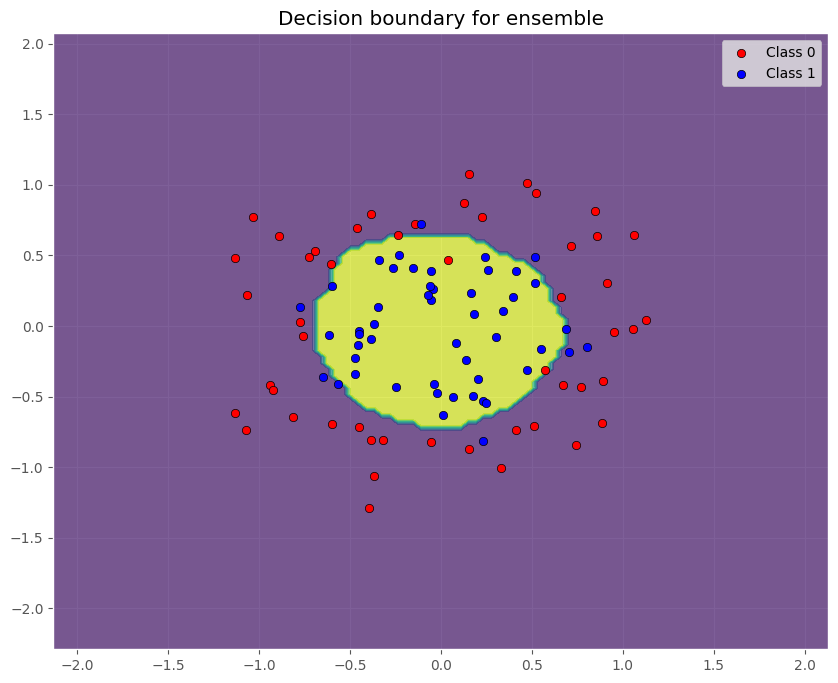

In [1439]:
DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', edgecolors='black', label='Class 1')
plt.legend()
plt.title("Decision boundary for ensemble")
plt.show()

Побудуємо границі рішень для окремої моделі методу опопрних векторів з гаусівською радіальною базисною функцією в якості ядра:

In [1440]:
model_single = SVC(C=0.7, kernel="rbf") 
model_single.fit(train_data, train_labels)
print(f"f1_score: {metrics.f1_score(test_labels, model_single.predict(test_data))}")

f1_score: 1.0


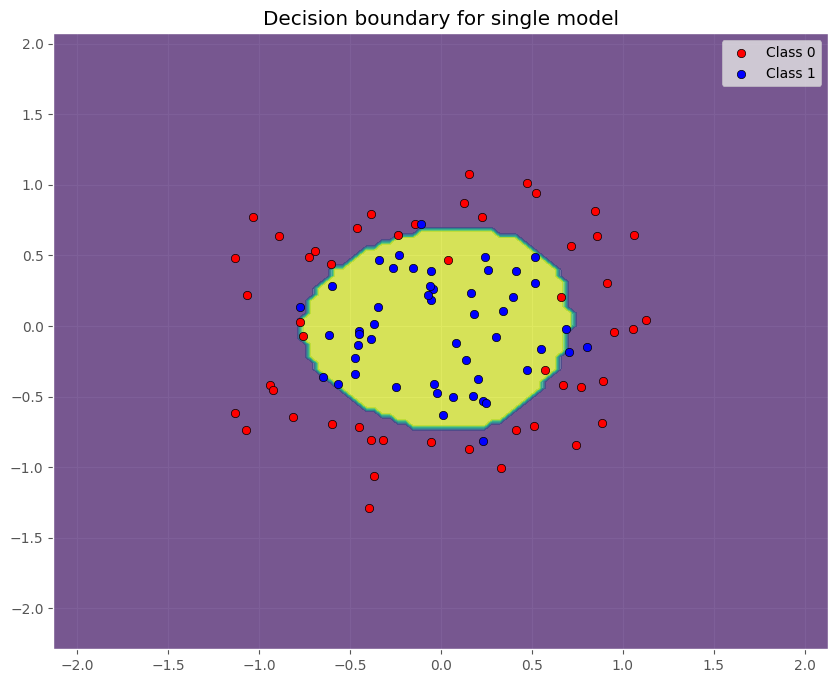

In [1441]:
DecisionBoundaryDisplay.from_estimator(model_single, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='b', edgecolors='black', label='Class 1')
plt.legend()
plt.title("Decision boundary for single model")
plt.show()

Розрахуємо значення зміщення та дисперсії для окремої моделі та ансамблю:

In [1442]:
avg_bias_ensemble = np.mean(test_labels - model.predict(test_data))
avg_bias_single_model = np.mean(test_labels - model_single.predict(test_data))
var_ensemble = np.mean((model.predict(test_data) - test_labels)**2)
var_single_model = np.mean((model_single.predict(test_data) - test_labels)**2)

print(f"Середнє зміщення ансамблю: {avg_bias_ensemble}")
print(f"Середнє зміщення окремої моделі: {avg_bias_single_model}")
print(f"Дисперсія ансамблю: {var_ensemble}")
print(f"Дисперсія окремої моделі: {var_single_model}")

Середнє зміщення ансамблю: 0.0
Середнє зміщення окремої моделі: 0.0
Дисперсія ансамблю: 0.0
Дисперсія окремої моделі: 0.0


Побудуємо графiк залежностi значень показника якостi даного ансамбля та iндивiдуальної моделi вiд n_estimators:

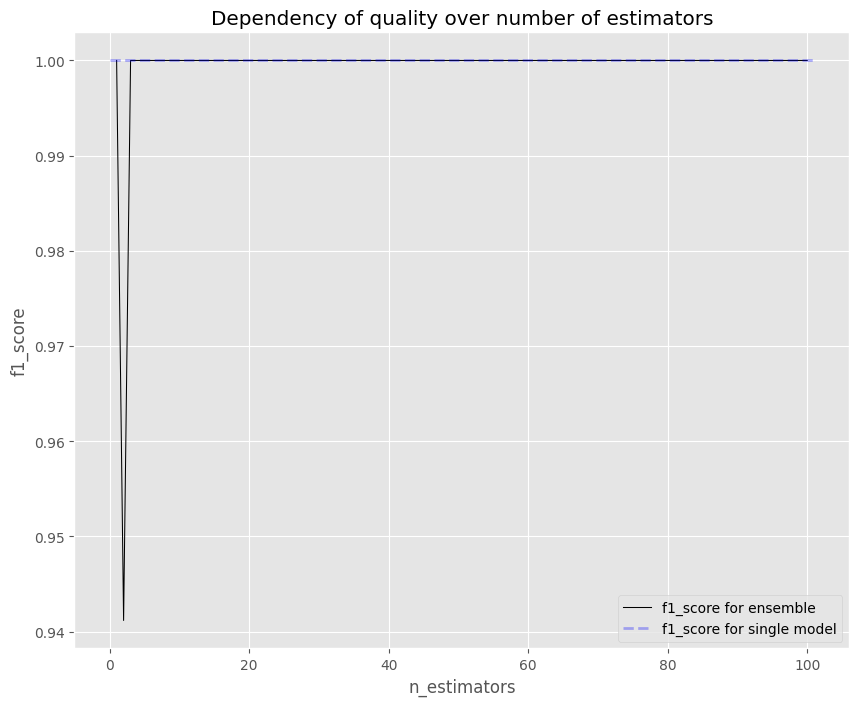

In [1443]:
n_estimators = np.arange(100) + 1
f1_score = []
for n in n_estimators:
    model_plot = BaggingClassifier(estimator=SVC(kernel="rbf"), n_estimators=n)
    model_plot.fit(train_data, train_labels)
    f1_score.append(metrics.f1_score(test_labels, model_plot.predict(test_data)))
f1_score = np.array(f1_score)

plt.plot(n_estimators, f1_score, label="f1_score for ensemble", linewidth=0.75, color="black")
plt.hlines(metrics.f1_score(test_labels, model_single.predict(test_data)), xmin=0, xmax=101, label="f1_score for single model", linestyles="dashed", linewidth=2, colors="blue", alpha=0.3)
plt.xlabel("n_estimators")
plt.ylabel("f1_score")
plt.title("Dependency of quality over number of estimators")
plt.legend()
plt.show()

Порівняємо час навчання ансамблю та окремої моделі:

In [1444]:
start_time = time.time()
model.fit(train_data, train_labels)
end_time = time.time()
print(f"Час навчання ансамблю: {end_time - start_time} секунд")

start_time = time.time()
model_single.fit(train_data, train_labels)
end_time = time.time()
print(f"Час навчання окремої моделі: {end_time - start_time} секунд")

Час навчання ансамблю: 0.02942633628845215 секунд
Час навчання окремої моделі: 0.001316070556640625 секунд


Отже, на даному наборі даних окрема модель та ансамбль показали однакові значення f1_score, проте їх границі рішення незначно відрізняються, час навчання окремої моделі менший за час навчання ансамблю.



Таким чином, для заданого набору даних і ансамблю на основі методу опопрних векторів з гаусівською радіальною базисною функцією в якості ядра, ансамбль не має суттєвої переваги над окремою моделлю.